
### Given: a list of target values of a binary classification problem, and 2 lists of corresponding predicted scores from 2 models (Model_1 and Model_2). 


In [2]:
### Read the target values and predicted scores into lists
def read_from_file(filename):
    file = open(filename, "r") 
    s = file.read()
    lines = s.split('\n')
    return [float(x) for x in lines]

target = read_from_file('target.csv')
pred_1 = read_from_file('pred_model1.csv')
pred_2 = read_from_file('pred_model2.csv')


### Target level 1 is positive, and 0 is negative. Threshold = 0.2 
### Confusion matrix for each model.

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import numpy as np

def threshold(arr):
    new_array = []
    for i in range(len(arr)):
        if arr[i] > 0.2:
            new_array.append(1)
        else: 
            new_array.append(0)
    return new_array

t_target= threshold(target)
p1_target= threshold(pred_1)
p2_target= threshold(pred_2)

pred1= confusion_matrix(t_target, p1_target)
pred2= confusion_matrix(t_target, p2_target)

print("The Confusion matrix for ")
print("Pred1 -> Target ")
print(pred1)
print("Pred2 -> Target ")
print(pred2)

The Confusion matrix for 
Pred1 -> Target 
[[1617   76]
 [ 208  764]]
Pred2 -> Target 
[[1285  408]
 [ 163  809]]


### TPR, FPR, TNR, FNR, Precision, Recall, F1-measure for each model.

In [41]:
from sklearn import metrics


fpr, tpr, thresholds= metrics.roc_curve(t_target, p1_target)

print('For model 1:')
print('TPR: ', tpr[1])
print('FPR: ', fpr[1])

pred1_ConfuMatrix = confusion_matrix(y_true= t_target, y_pred= p1_target, labels= [0,1])
pred2_ConfuMatrix = confusion_matrix(y_true= t_target, y_pred= p2_target, labels= [0,1])


TP1= (pred1_ConfuMatrix[0][0])
FP1= (pred1_ConfuMatrix[0][1])
FN1= (pred1_ConfuMatrix[1][0])
TN1= (pred1_ConfuMatrix[1][1])

TP2= (pred2_ConfuMatrix[0][0])
FP2= (pred2_ConfuMatrix[0][1])
FN2= (pred2_ConfuMatrix[1][0])
TN2= (pred2_ConfuMatrix[1][1])

FNR1= (FN1/(TP1+FN1))
TNR1= (TN1/(TN1+FP1))

Precision1= (TP1/(TP1+FP1))
Recall1=(TP1/(TP1+FN1))
F1_Score1=((2*Precision1*Recall1)/(Precision1+Recall1))

print('FNR:', FNR1)
print('TNR:', Precision1)
print('Precision:', TNR1)
print('Recall:', Recall1)
print('F1-Score:', F1_Score1)


#model 2

fpr2, tpr2, thresholds2= metrics.roc_curve(t_target, p2_target)

print('For model 2:')
print('TPR: ', tpr2[1])
print('FPR: ', fpr2[1])



FNR2= (FN2/(TP2+FN2))
TNR2= (TP2/(TP2+FP2))

Precision2= (TP2/(TP2+FP2))
Recall2=(TP2/(TP2+FN2))
F1_Score2=((Precision2*Recall2)/(Precision2+Recall2))

print('FNR:', FNR2)
print('TNR:', TNR2)
print('Precision:', Precision2)
print('Recall:', Recall2)
print('F1-Score:', F1_Score2)

For model 1:
TPR:  0.7860082304526749
FPR:  0.0448907265209687
FNR: 0.11397260273972602
TNR: 0.9551092734790313
Precision: 0.9095238095238095
Recall: 0.886027397260274
F1-Score: 0.9192723138146675
For model 2:
TPR:  0.8323045267489712
FPR:  0.2409923213230951
FNR: 0.11256906077348067
TNR: 0.7590076786769049
Precision: 0.7590076786769049
Recall: 0.8874309392265194
F1-Score: 0.40910538045208533


### Question 3. Draw ROC curves of the two models. 

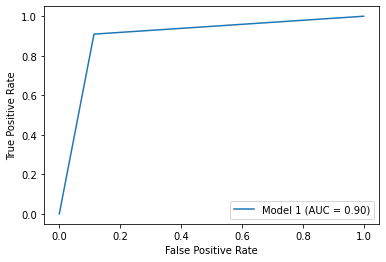

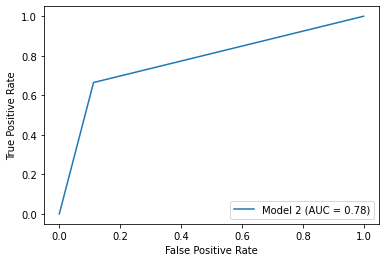

In [42]:

fpr, tpr, threshold = metrics.roc_curve(p1_target, t_target)
roc_auc = metrics.auc(fpr, tpr)

display_m1 = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Model 1')

display_m1.plot()

fpr1, tpr2, threshold2 = metrics.roc_curve(p2_target, t_target)
roc_auc2 = metrics.auc(fpr1, tpr2)

display_m2 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 2')

display_m2.plot()




### Question 4. For each model, what is the value of the ROC Index? Which model has better performance according to ROC Index? 

In [43]:
# For model 1 the ROC index is 0.90 and for Model 2 the index is 0.78. Since model 1 has the greater area under curve, 
# we can conclude that model one has superior performance.